Sampel Data:
   Luas (m²)  Kamar Tidur  Kamar Mandi  Harga (juta)
0        152            2            2    630.684113
1        142            3            1    675.569355
2         64            3            2    454.014568
3        156            1            1    625.572626
4        121            3            2    605.458083

Hasil Training Model:
Intercept: 5.02
Koefisien per fitur:
- Luas: 3.51
- Kamar Tidur: 45.79
- Kamar Mandi: 28.14

Evaluasi Model:
Mean Squared Error (MSE): 873.21
R-squared Score (R²): 0.97


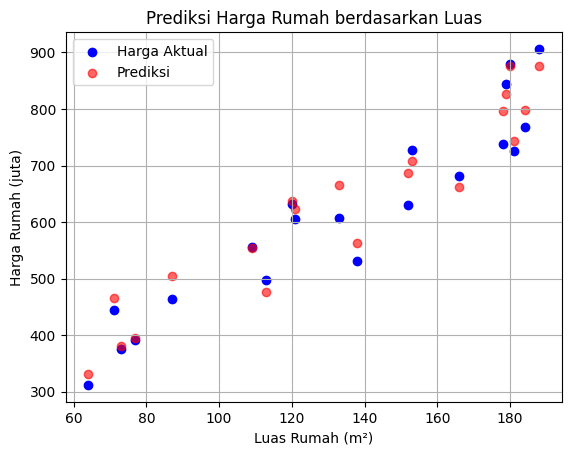

Model berhasil disimpan sebagai 'model_prediksi_harga_rumah.pkl'


In [2]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os

# Membuat direktori 'models' jika belum ada
os.makedirs("models", exist_ok=True)

# 1. Membuat dataset dummy untuk prediksi harga rumah
# Fitur: luas (m²), jumlah kamar tidur, jumlah kamar mandi
#Simulasi data 100 rumah.
#luas rumah di antara 50–200 m².
#kamar_tidur antara 1–4 kamar.
#kamar_mandi antara 1–2 kamar mandi.
np.random.seed(42)
luas = np.random.randint(50, 200, 100).reshape(-1, 1)
kamar_tidur = np.random.randint(1, 5, 100).reshape(-1, 1)
kamar_mandi = np.random.randint(1, 3, 100).reshape(-1, 1)

# Harga rumah (dalam juta) = kombinasi linier + noise
harga = (luas * 3.5) + (kamar_tidur * 50) + (kamar_mandi * 25) + np.random.randn(100, 1) * 30

# Gabungkan menjadi 1 array
X = np.hstack((luas, kamar_tidur, kamar_mandi))
Y = harga

# Tampilkan sampel data 
df = pd.DataFrame(X, columns=["Luas (m²)", "Kamar Tidur", "Kamar Mandi"])
df["Harga (juta)"] = Y
print("Sampel Data:")
print(df.head())

# 2. Split data training dan testing 80% data untuk training, 20% untuk testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Buat model linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

# 4. Hasil training model
print("\nHasil Training Model:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print("Koefisien per fitur:")
for fitur, coef in zip(["Luas", "Kamar Tidur", "Kamar Mandi"], model.coef_[0]):
    print(f"- {fitur}: {coef:.2f}")

# 5. Prediksi data uji
Y_pred = model.predict(X_test)

# 6. Evaluasi model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

# 7. Visualisasi (menggunakan 1 fitur: Luas)
plt.scatter(X_test[:, 0], Y_test, color="blue", label="Harga Aktual")
plt.scatter(X_test[:, 0], Y_pred, color="red", label="Prediksi", alpha=0.6)
plt.xlabel("Luas Rumah (m²)")
plt.ylabel("Harga Rumah (juta)")
plt.legend()
plt.title("Prediksi Harga Rumah berdasarkan Luas")
plt.grid(True)
plt.show()

# 8. Simpan model
with open("models/model_prediksi_harga_rumah.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai 'model_prediksi_harga_rumah.pkl'")
